In [1]:
from __future__ import (division, print_function)

In [135]:
%autoreload 2
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [416]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import h5py
import cPickle
from scipy.spatial import KDTree
#import seaborn as sns
#sns.set_style('white')

In [5]:
import statsmodels as sm

In [448]:
import sys
sys.path.append("../")
import extract_catalog as ec
import plot_gal_prop as plotg
import plot_DM_prop as plotDM
import get_DM_centroids as getDM
import get_KDE 

In [8]:
partDMfile = "../../data/Illustris-1_" + \
    "00135_APillepich_KarenNG_ParticleData_Group_PartType1.h5"

data_f = h5py.File("../../data/Illustris-1_fof_subhalo" +
                   "_myCompleteHaloCatalog_00135.hdf5")

In [9]:
partDM = h5py.File(partDMfile)

In [507]:
part_halos = h5py.File("../../data/DM_particles_clst_loc.h5")
haloEndIx = part_halos["loc"][...]

In [623]:
fhat_stars = cPickle.load(open("../../data/fhat_I_lum.pkl", "r"))

In [636]:
clstNo = 1 #range(129)
threshold = 0.5

In [625]:
matches = {}

In [626]:
%time coord_dict = ec.get_DM_particles([clstNo], partDM, dataPath="../../data/")

CPU times: user 3.81 s, sys: 3.62 s, total: 7.43 s
Wall time: 10.6 s


# the first halo id is 1 ..... different than other index scheme

In [627]:
%time fhat = getDM.make_histogram_with_2kpc_resolution(coord_dict[clstNo])

CPU times: user 1min 57s, sys: 2.98 s, total: 2min
Wall time: 1min 59s


have a background count threshold on the density

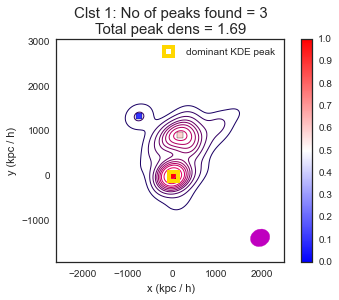

In [628]:
plt.figure(figsize=(25, 25))
plotg.plot_KDE_peaks(fhat_stars[clstNo], clstNo=clstNo)

In [629]:
fhat["log_est"] = np.log(fhat["estimate"])

Converting unit of kpc / h to kpc for galaxy data
CPU times: user 56 s, sys: 3.64 s, total: 59.7 s
Wall time: 59.8 s


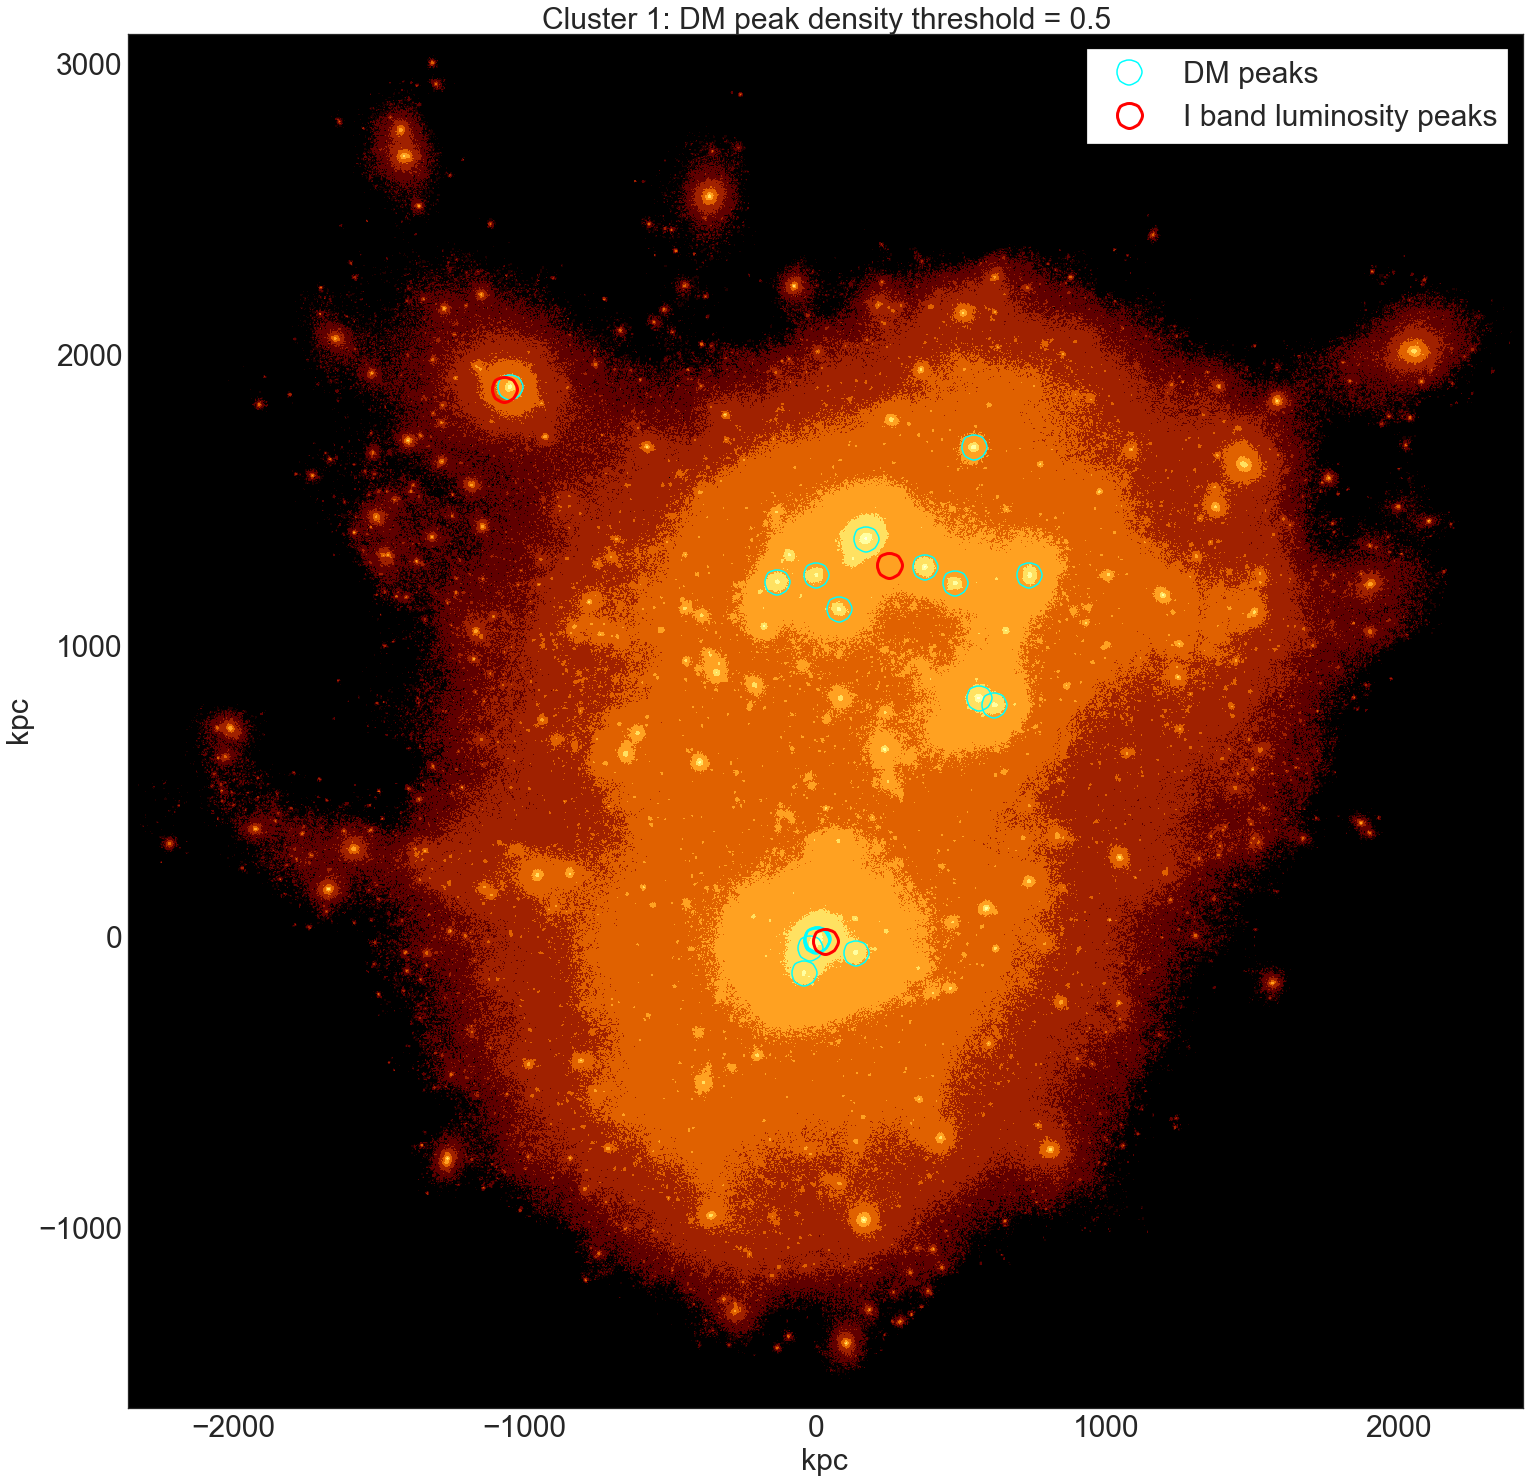

In [637]:
plt.figure(figsize=(25, 25))
%time plotDM.plot_DM_fhat(fhat, fhat_stars[clstNo], clstNo, threshold=threshold)

In [638]:
matches[clstNo] = {}

In [639]:
matches[clstNo]["dist"], matches[clstNo]["match_ix"] = \
    getDM.match_DM_peaks_with_gal_peaks(fhat, fhat_stars[clstNo], 
                                        threshold=threshold)

Converting subhalo distance units from kpc / h to kpc


In [640]:
uncertainty = np.sqrt(fhat_stars[clstNo]["bandwidth_matrix_H"])
err = np.sqrt(uncertainty[0, 0] ** 2. + uncertainty[1, 1])

In [641]:
print("offset = {0:.2f} +/- {1:.2f} kpc".format(matches[clstNo]["dist"][0], 
                                            err + 2))

offset = 24.16 +/- 219.31 kpc
